# Assignment
Build the AlexNet architecture and train it on the CIFAR10 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy. The exact AlexNet architecture and number of units will not work.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add units and layers progressively.
- Kernels that are too large or too much pooling will reduce the size of layer ouputs
- Try Batch Norm and Dropout
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!.
- Functional API!


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Name of the label (10 labels)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
# We have 50 000 images for the training datasets and 10 000 images for the test dataset. 32 x 32 pixels. 3 colors.
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


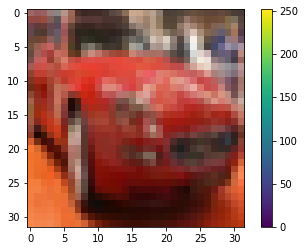

In [ ]:
# The pixel values fall in the range of 0 to 255.

plt.figure()
plt.imshow(X_train_full[5])
plt.colorbar()
plt.grid(False)
plt.show()

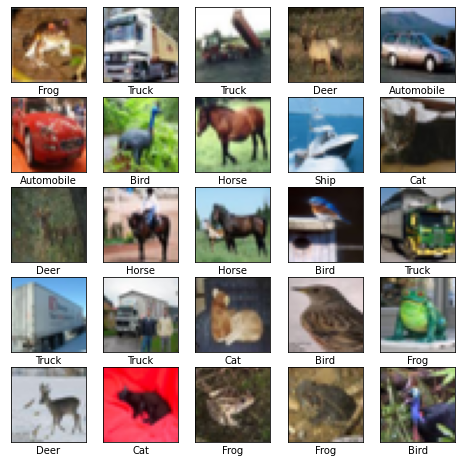

In [ ]:
# Verify that the data is in the correct format and that you're ready to build and train the network.

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i][0]])
plt.show()

In [ ]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

X_train = X_train_full / 255.0
X_test = X_test / 255.0

In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train = to_categorical(y_train_full)
y_test = to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 10))
((10000, 32, 32, 3), (10000, 10))


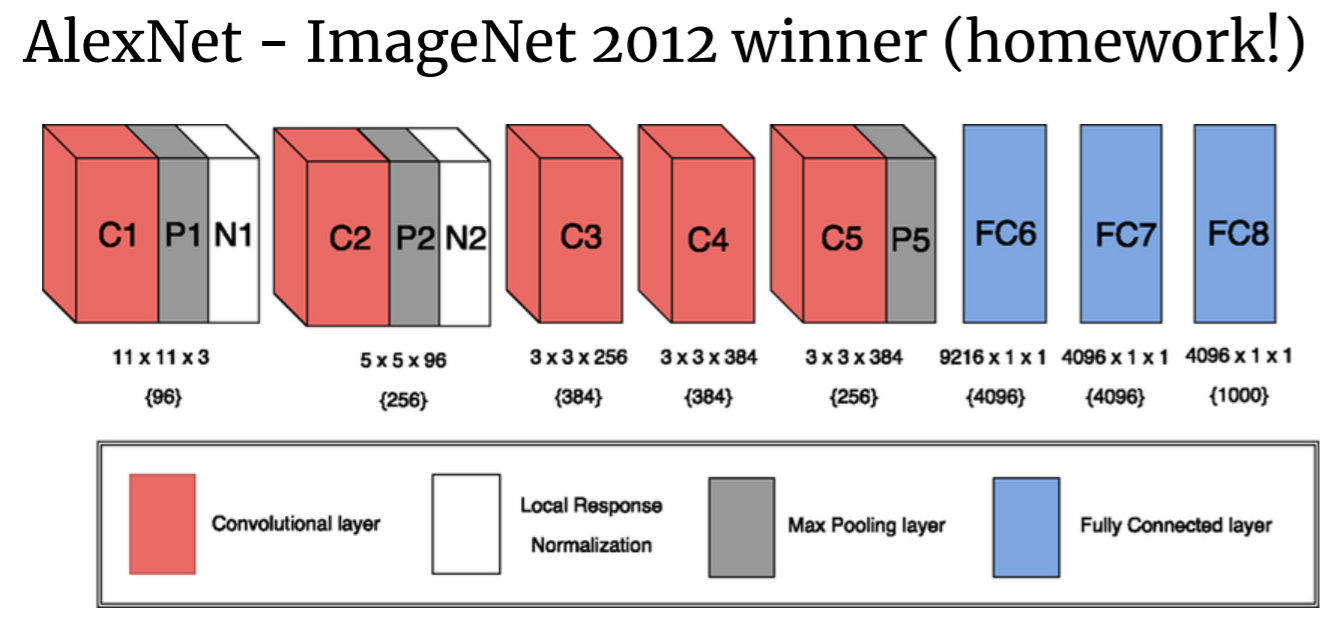

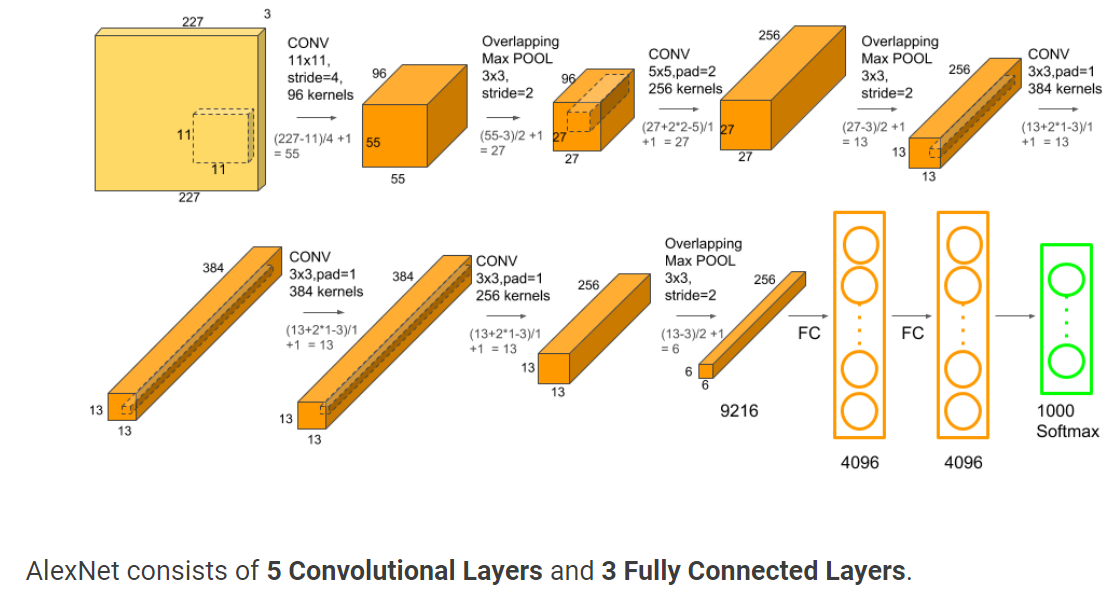

<font color="blue">For the AlexNet model, in the first convolutional layer I changed the size of my kernel at (5,5) and the stride at (1,1) beacause CIFAR10 (32 x 32) is small image comparatively of ImageNet (227 x 227). I used valid padding (involves no padding) for the first convolutional layer, but for they others convolutional layer I used same padding. For the two first convolutional layer, I use batchnormalization and for all convolutional and fully connected layer, I used dropout of 0.5.

<font color="blue">I trained my model with optimizer SGD (momentum of 0.9 and decay of 0.0001) with a batch size of 64. I initializeg the weight in each layer from a Glarot Normal and I used relu for the activation function. For the output layer, I used SoftMax activation function. The learning rate is initialized at 0.01 and reduce 2 times (after each 30 epoch) by a divide of 10. I trained the CNN for 90 epoch.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras.backend as K

K.clear_session()
inputs = keras.Input(shape=(32,32,3), name='CIFAR10')
x = inputs

# 1st Convolutional Layer:
# I change the kernel_size and the strides because CIFAR10 (32 x 32) is small dataset that ImageNet (227 x 227)
# x = layers.Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', name='Convolution_1')(x)
x = layers.Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu',  kernel_initializer='GlorotNormal', name='Convolution_1')(x)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', name='MaxPool_1')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

#2nd Convolutional Layer:
x = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', kernel_initializer='GlorotNormal', name='Convolution_2')(x)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='MaxPool_2')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

#3rd Convolutional Layer
x = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_initializer='GlorotNormal', name='Convolution_3')(x)
x = layers.Dropout(0.5)(x)

#4th Convolutional Layer
x = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_initializer='GlorotNormal', name='Convolution_4')(x)
x = layers.Dropout(0.5)(x)

#5th Convolutional Layer
x = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_initializer='GlorotNormal', name='Convolution_5')(x)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='MaxPool_3')(x)
x = layers.Dropout(0.5)(x)

#Passing it to a Fully Connected layer
flat = layers.Flatten()(x)

# 1st Fully Connected Layer
x = layers.Dense(4096, activation='relu', kernel_initializer='GlorotNormal')(flat)
x = layers.Dropout(0.5)(x)

#2nd Fully Connected Layer
x = layers.Dense(4096, activation='relu', kernel_initializer='GlorotNormal')(x)
x = layers.Dropout(0.5)(x)

#3rd Fully Connected Layer
x = layers.Dense(1000, activation='relu', kernel_initializer='GlorotNormal')(x)
x = layers.Dropout(0.5)(x)

#Output Layer
outputs = layers.Dense(10, activation='softmax')(x)

Model = keras.Model(inputs=inputs, outputs=outputs, name='Model_CIFAR10')
#Model Summary
Model.summary()
#keras.utils.plot_model(Model, show_shapes=True)

Model: "Model_CIFAR10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CIFAR10 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Convolution_1 (Conv2D)       (None, 28, 28, 96)        7296      
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 13, 13, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 96)        384       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 96)        0         
_________________________________________________________________
Convolution_2 (Conv2D)       (None, 13, 13, 256)       614656    
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 7, 7, 256)       

In [ ]:
def scheduler(epoch):
  if epoch < 30:
    return 0.01
  if epoch < 60:
    return 0.001
  else:
    return 0.0001

In [ ]:
lrs = keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# Compiling the model
Model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(momentum=0.9, decay=0.0001), metrics=['accuracy'])

In [ ]:
h = Model.fit(X_train, y_train, batch_size=64, epochs=90, callbacks=[lrs], validation_split=0.2) 

Epoch 1/90
625/625 [==============================] - 52s 29ms/step - loss: 2.3570 - accuracy: 0.1584 - val_loss: 1.8462 - val_accuracy: 0.3060
Epoch 2/90
625/625 [==============================] - 18s 29ms/step - loss: 1.7953 - accuracy: 0.3061 - val_loss: 1.8702 - val_accuracy: 0.3049
Epoch 3/90
625/625 [==============================] - 18s 29ms/step - loss: 1.6265 - accuracy: 0.3885 - val_loss: 1.7389 - val_accuracy: 0.3603
Epoch 4/90
625/625 [==============================] - 19s 30ms/step - loss: 1.5257 - accuracy: 0.4381 - val_loss: 1.5666 - val_accuracy: 0.4540
Epoch 5/90
625/625 [==============================] - 18s 29ms/step - loss: 1.4209 - accuracy: 0.4857 - val_loss: 1.4660 - val_accuracy: 0.4626
Epoch 6/90
625/625 [==============================] - 18s 29ms/step - loss: 1.3374 - accuracy: 0.5222 - val_loss: 1.3430 - val_accuracy: 0.5442
Epoch 7/90
625/625 [==============================] - 18s 29ms/step - loss: 1.2604 - accuracy: 0.5534 - val_loss: 1.2332 - val_accuracy:

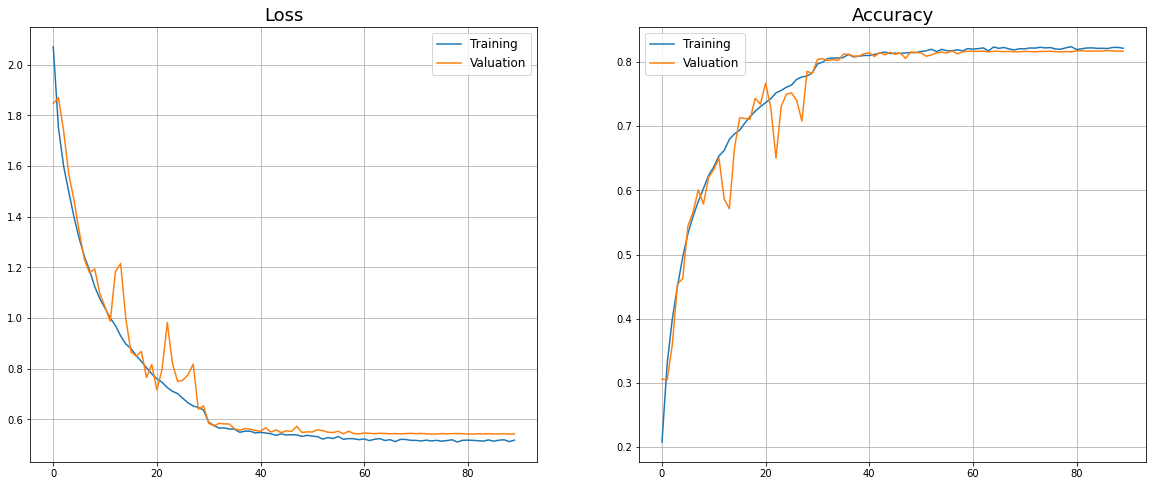

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(h.history['loss'], label='Training')
axs[0].plot(h.history['val_loss'], label='Valuation')
axs[0].set_title('Loss', fontsize=18)
axs[0].grid(True)
axs[0].legend(fontsize=12)

axs[1].plot(h.history['accuracy'], label='Training')
axs[1].plot(h.history['val_accuracy'], label='Valuation')
axs[1].set_title('Accuracy', fontsize=18)
axs[1].grid(True)
axs[1].legend(fontsize=12)

In [ ]:
# Evaluate the model on the test data 
print("Evaluate on test data")
results = Model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss, Test Accuracy:", results)

Evaluate on test data
157/157 [==============================] - 1s 9ms/step - loss: 0.5556 - accuracy: 0.8121
Test Loss, Test Accuracy: [0.5555716156959534, 0.8120999932289124]


In [ ]:
#Making prediction
Y_pred=Model.predict(X_test)
y_pred=np.argmax(Y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

print('Confusion Matrix with Test Dataset:')
print(confusion_mtx)

Confusion Matrix with Test Dataset:
[[818  16  26  12  21   2  14   6  57  28]
 [  8 877   1   3   4   3  12   1  23  68]
 [ 53   1 647  39  87  53  84  22  10   4]
 [ 13   6  42 646  57 120  66  30  10  10]
 [  6   0  24  34 822  13  51  40   8   2]
 [  9   1  12 149  44 720  23  36   2   4]
 [  3   2  12  35  14   7 918   4   4   1]
 [ 10   0  12  20  37  47  10 855   3   6]
 [ 31   9   3   8   6   0   4   0 924  15]
 [ 20  26   4   7   7   3  10   6  23 894]]


In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score For Test Dataset = ', acc_score)

Accuracy Score For Test Dataset =  0.8121
